In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from tools_fast import *
from clustering import cluster, cluster_net
from hc_graph import *

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [3]:
fund_name = 'HFRXRVA'
pd.read_csv(r"financial_data/hfrx_index_names.csv", index_col=0)

,Full Name
Name,
HFRXAR,HFRX Absolute Return Index
HFRXDS,HFRX ED: Distressed Restructuring Index
HFRXMA,HFRX ED: Merger Arbitrage Index
HFRXSS,HFRX ED: Special Situations Index
HFRXEMN,HFRX EH: Equity Market Neutral Index
HFRXEHG,HFRX EH: Fundamental Growth Index
HFRXEHV,HFRX EH: Fundamental Value Index
HFRXEMC,HFRX Emerging Markets Composite Index
HFRXEW,HFRX Equal Weighted Strategies Index


### Financial data loads and cleaning

In [4]:
# US rate
US_rate = pd.read_csv(r"financial_data/USD_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']

# HFRX
hfrx_all = pd.read_csv(r"financial_data/hfrx_daily_index_data.csv", index_col=0, parse_dates=True, dayfirst=True)
hfrx = make_ER(hfrx_all[[fund_name]].dropna(), US_rate)

# BNP

bnp = pd.read_csv(r"financial_data/bnp_data_long_term.csv", index_col=0, parse_dates=True, dayfirst=True)

risk_premia = pd.read_pickle("financial_data/risk_premia_ER_FX_USD.pkl").drop('BPCURVW4', axis=1)


In [5]:
df_info = pd.read_csv(r"financial_data/bnp_info.csv", index_col=0)
df_info

,Asset Class,Style
Ticker,,
BNPIDRXA,Commodity,Carry
BNPIF3AX,Commodity,Carry
BNPIF3XM,Commodity,Momentum
BPFXSTGU,FX,Value
BNPICCE3,Equity,Carry
BNPIVMRU,Equity,Reversal
BPCURVW4,MM,Carry
BNPIVCXA,Commodity,Volatility
BNPIAIRT,Bonds,Volatility


In [6]:
prices_all = hfrx.join(bnp,how="left").join(risk_premia,how="left").ffill()
prices_all.corr()[fund_name].sort_values()

BNPIFUS2   -0.523419
BNPIFUS5   -0.481340
BPFXPHP1   -0.462853
BNPIFU10   -0.460206
BNPIFAU3   -0.457578
BNPIFXMG   -0.437293
BNPIFJ10   -0.424421
BNPIFU30   -0.419666
BNPIF3XM   -0.411369
SPGSGCP    -0.401455
BPFXBRL1   -0.393616
BPFXTRY1   -0.393608
BNPIFEU2   -0.376985
BNPIFG10   -0.349750
BNPIFA10   -0.346766
BNPIFEU5   -0.346211
BNPIFE10   -0.337797
BPFXCOP1   -0.278063
BNPIFKR    -0.265474
BNPIDRXA   -0.265141
BNPIFE30   -0.255884
BPFXSGD1   -0.252571
BNPIFCN    -0.245592
BNPIFI10   -0.243094
BPFXINR1   -0.233092
BNPIFF10   -0.229653
BNPXCEX5   -0.227865
BPFXHUF1   -0.209183
BPFXSTGU   -0.204952
BPFXAUD1   -0.197314
              ...   
SPGSGOP     0.195850
BNPIAIRE    0.216416
BPFXMXN1    0.218890
SPGSHUP     0.226579
BNPIAIRT    0.230422
BNPIFRU     0.233202
BNPIFJP     0.237682
BNPIAIRB    0.244744
BNPIPVEE    0.252559
BNPIPVUH    0.285875
BNPIAIRU    0.287444
SPGSBRP     0.307376
BNPIPMUH    0.314634
SPGSIZP     0.345726
BPFXSEK1    0.347199
BPFXGGUR    0.351078
BNPIFJT     0

In [7]:
prices_all = hfrx.join(bnp,how="left").join(risk_premia,how="left").ffill()
returns_all = prices_all.pct_change().iloc[1:]
hrfx_returns = returns_all[[fund_name]]
returns_all = returns_all.drop(fund_name, axis=1)
prices_all = prices_all.drop(fund_name, axis=1).bfill()

In [8]:
prices_futur = hfrx.join(bnp,how="left")
returns_fut = prices_futur.pct_change().iloc[1:]
hrfx_returns_fut = returns_fut[[fund_name]]
returns_fut = returns_fut.drop(fund_name, axis=1)
prices_futur = prices_futur.drop(fund_name, axis=1).bfill()

In [9]:
prices_risk_premia = hfrx.join(risk_premia,how="left").ffill()
returns_risk_premia = prices_risk_premia.pct_change().iloc[1:]
hrfx_returns_rp = returns_risk_premia[[fund_name]]
returns_risk_premia = returns_risk_premia.drop(fund_name, axis=1)
prices_risk_premia = prices_risk_premia.drop(fund_name, axis=1).bfill()

## Estimation of the exposures

In [10]:
size = 126
freq = 5
freq_ml = 20

### Volatility adjustment

In [11]:
tau = 0.1
tc = 0.0005
nu = 1.0
lag_fut = 2
lag_rp = 3
lag = max(lag_fut, lag_rp)
vol_period = 20


In [12]:
%%time
df_weight_kalman_aic_voladj = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_bic_voladj = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_bic_voladj = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_aic_voladj = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_voladj = kalman_filter(hrfx_returns, returns_all,freq, sigma_weight=1. , sigma_return=nu,
                                        vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_voladj, _ = ml_kalman_filter(hrfx_returns, returns_all, freq_ml, tau=tau, vol_target=True, vol_period=vol_period)

prices_for_track = prices_all.loc[df_weight_kalman_voladj.index[0]:]

replication_kalman_voladj = make_track(prices_for_track, df_weight_kalman_voladj, tc=tc, lag=lag)
df_res_voladj = hfrx.loc[replication_kalman_voladj.index]
df_res_voladj["Kalman VT"] = replication_kalman_voladj

replication_ml_kalman_voladj = make_track(prices_for_track, df_weight_ml_kalman_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman VT"] = replication_ml_kalman_voladj

prices_for_track = prices_all.loc[df_weight_kalman_aic_voladj.index[0]:]

replication_kalman_aic_voladj = make_track(prices_for_track, df_weight_kalman_aic_voladj, tc=tc, lag=lag)
df_res_voladj["Kalman AIC VT"] = replication_kalman_aic_voladj

replication_ml_kalman_aic_voladj = make_track(prices_for_track, df_weight_ml_kalman_aic_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman AIC VT"] = replication_ml_kalman_aic_voladj

replication_kalman_bic_voladj = make_track(prices_for_track, df_weight_kalman_bic_voladj, tc=tc, lag=lag)
df_res_voladj["Kalman BIC VT"] = replication_kalman_bic_voladj

replication_ml_kalman_bic_voladj = make_track(prices_for_track, df_weight_ml_kalman_bic_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman BIC VT"] = replication_ml_kalman_bic_voladj

Wall time: 2min 21s


In [13]:
%%time
df_weight_kalman_aic_voladj_fut = selective_kalman_filter(hrfx_returns_fut, returns_fut,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_bic_voladj_fut = selective_kalman_filter(hrfx_returns_fut, returns_fut,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_bic_voladj_fut = ml_selective_kalman_filter(hrfx_returns_fut, returns_fut,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_aic_voladj_fut = ml_selective_kalman_filter(hrfx_returns_fut, returns_fut,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_voladj_fut = kalman_filter(hrfx_returns_fut, returns_fut,freq, sigma_weight=1. , sigma_return=nu,
                                        vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_voladj_fut, _ = ml_kalman_filter(hrfx_returns_fut, returns_fut, freq_ml, tau=tau, vol_target=True, vol_period=vol_period)

prices_for_track = prices_futur.loc[df_weight_kalman_voladj_fut.index[0]:]

replication_kalman_voladj_fut = make_track(prices_for_track, df_weight_kalman_voladj_fut, tc=tc, lag=lag_fut)
df_res_voladj_fut = hfrx.loc[replication_kalman_voladj_fut.index]
df_res_voladj_fut["Kalman VT"] = replication_kalman_voladj_fut

replication_ml_kalman_voladj_fut = make_track(prices_for_track, df_weight_ml_kalman_voladj_fut, tc=tc, lag=lag_fut)
df_res_voladj_fut["ML Kalman VT"] = replication_ml_kalman_voladj_fut

prices_for_track = prices_futur.loc[df_weight_kalman_aic_voladj_fut.index[0]:]

replication_kalman_aic_voladj_fut = make_track(prices_for_track, df_weight_kalman_aic_voladj_fut, tc=tc, lag=lag_fut)
df_res_voladj_fut["Kalman AIC VT"] = replication_kalman_aic_voladj_fut

replication_ml_kalman_aic_voladj_fut = make_track(prices_for_track, df_weight_ml_kalman_aic_voladj_fut, tc=tc, lag=lag_fut)
df_res_voladj_fut["ML Kalman AIC VT"] = replication_ml_kalman_aic_voladj_fut

replication_kalman_bic_voladj_fut = make_track(prices_for_track, df_weight_kalman_bic_voladj_fut, tc=tc, lag=lag_fut)
df_res_voladj_fut["Kalman BIC VT"] = replication_kalman_bic_voladj_fut

replication_ml_kalman_bic_voladj_fut = make_track(prices_for_track, df_weight_ml_kalman_bic_voladj_fut, tc=tc, lag=lag_fut)
df_res_voladj_fut["ML Kalman BIC VT"] = replication_ml_kalman_bic_voladj_fut

Wall time: 1min 27s


In [14]:
%%time
df_weight_kalman_aic_voladj_rp = selective_kalman_filter(hrfx_returns_rp, returns_risk_premia,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_bic_voladj_rp = selective_kalman_filter(hrfx_returns_rp, returns_risk_premia,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_bic_voladj_rp = ml_selective_kalman_filter(hrfx_returns_rp, returns_risk_premia,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_aic_voladj_rp = ml_selective_kalman_filter(hrfx_returns_rp, returns_risk_premia,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_voladj_rp = kalman_filter(hrfx_returns_rp, returns_risk_premia,freq, sigma_weight=1. , sigma_return=nu,
                                        vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_voladj_rp, _ = ml_kalman_filter(hrfx_returns_rp, returns_risk_premia, freq_ml, tau=tau, vol_target=True, vol_period=vol_period)

prices_for_track = prices_risk_premia.loc[df_weight_kalman_voladj_rp.index[0]:]

replication_kalman_voladj_rp = make_track(prices_for_track, df_weight_kalman_voladj_rp, tc=tc, lag=lag_rp)
df_res_voladj_risk_premia = hfrx.loc[replication_kalman_voladj_rp.index]
df_res_voladj_risk_premia["Kalman VT"] = replication_kalman_voladj_rp

replication_ml_kalman_voladj_rp = make_track(prices_for_track, df_weight_ml_kalman_voladj_rp, tc=tc, lag=lag_rp)
df_res_voladj_risk_premia["ML Kalman VT"] = replication_ml_kalman_voladj_rp

prices_for_track = prices_risk_premia.loc[df_weight_kalman_aic_voladj_rp.index[0]:]

replication_kalman_aic_voladj_rp = make_track(prices_for_track, df_weight_kalman_aic_voladj_rp, tc=tc, lag=lag_rp)
df_res_voladj_risk_premia["Kalman AIC VT"] = replication_kalman_aic_voladj_rp

replication_ml_kalman_aic_voladj_rp = make_track(prices_for_track, df_weight_ml_kalman_aic_voladj_rp, tc=tc, lag=lag_rp)
df_res_voladj_risk_premia["ML Kalman AIC VT"] = replication_ml_kalman_aic_voladj_rp

replication_kalman_bic_voladj_rp = make_track(prices_for_track, df_weight_kalman_bic_voladj_rp, tc=tc, lag=lag_rp)
df_res_voladj_risk_premia["Kalman BIC VT"] = replication_kalman_bic_voladj_rp

replication_ml_kalman_bic_voladj_rp = make_track(prices_for_track, df_weight_ml_kalman_bic_voladj_rp, tc=tc, lag=lag_rp)
df_res_voladj_risk_premia["ML Kalman BIC VT"] = replication_ml_kalman_bic_voladj_rp

Wall time: 35 s


### All Factors

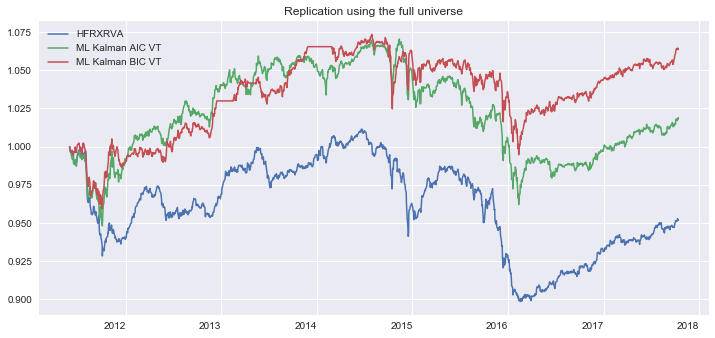

In [43]:
start = '06-2011'
df_res_voladj = df_res_voladj.dropna().loc[start:'2017-10-13']
df_res_voladj = (df_res_voladj / df_res_voladj.iloc[0])
df_res_voladj[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5,
                                                                        title='Replication using the full universe')
df_res_volperfadj = df_res_voladj[[fund_name]].copy()
temp = df_res_voladj.drop(fund_name, axis=1)
df_res_volperfadj[temp.columns]= make_ER(temp, 2 + 0 * US_rate)

In [44]:
df_stat_vol = replication_stats(df_res_voladj, fund_name=fund_name)
df_stat_vol

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
HFRXRVA,1.000000,1.000000,0.000000,1.000000,-0.225859,-0.007630,-0.110465
Kalman VT,0.721996,0.458960,0.022949,0.478361,0.144801,0.003836,-0.066775
ML Kalman VT,0.591003,0.339533,0.027934,0.227112,0.228670,0.006389,-0.069207
Kalman AIC VT,0.678832,0.430059,0.024678,0.396798,-0.180321,-0.005744,-0.111575
ML Kalman AIC VT,0.667135,0.402686,0.026207,0.319730,0.104776,0.002870,-0.094876
Kalman BIC VT,0.630257,0.389122,0.025679,0.346879,0.182316,0.004579,-0.068655
ML Kalman BIC VT,0.653105,0.376452,0.025561,0.352878,0.348118,0.009813,-0.067001


### Classic Factors

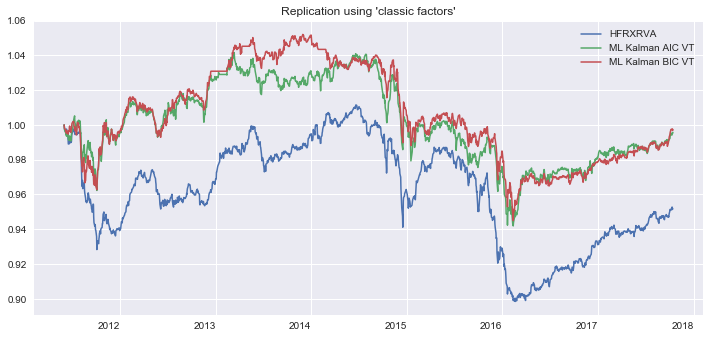

In [45]:
df_res_voladj_fut = df_res_voladj_fut.dropna().loc[start:'2017-10-13']
df_res_voladj_fut = (df_res_voladj_fut / df_res_voladj_fut.iloc[0])
df_res_voladj_fut[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5,
                                                                        title="Replication using 'classic factors'")
df_res_volperfadj_fut = df_res_voladj_fut[[fund_name]].copy()
temp = df_res_voladj_fut.drop(fund_name, axis=1)
df_res_volperfadj_fut[temp.columns]= make_ER(temp, 2 + 0 * US_rate)

In [46]:
df_stat_vol_fut = replication_stats(df_res_voladj_fut, fund_name=fund_name)
df_stat_vol_fut

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
HFRXRVA,1.000000,1.000000,0.000000,1.000000,-0.225859,-0.007630,-0.110465
Kalman VT,0.688832,0.451170,0.024367,0.411932,0.044024,0.000867,-0.070345
ML Kalman VT,0.596730,0.319768,0.027409,0.255916,0.158200,0.004167,-0.072413
Kalman AIC VT,0.672502,0.427984,0.024378,0.411388,-0.023634,-0.001039,-0.078256
ML Kalman AIC VT,0.649189,0.411925,0.025931,0.334013,-0.008639,-0.000707,-0.094247
Kalman BIC VT,0.608788,0.395843,0.026182,0.321068,0.100253,0.002296,-0.075017
ML Kalman BIC VT,0.630301,0.388694,0.025724,0.344583,0.000444,-0.000359,-0.094810


### Risk Premia

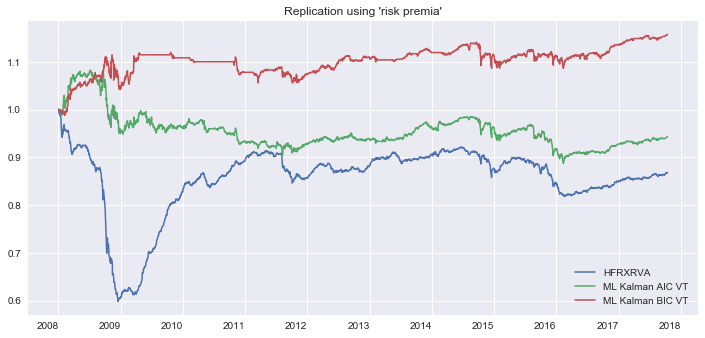

In [41]:
df_res_voladj_risk_premia = df_res_voladj_risk_premia.dropna().loc[start:'2017-10-13']
df_res_voladj_risk_premia = (df_res_voladj_risk_premia / df_res_voladj_risk_premia.iloc[0])
df_res_voladj_risk_premia[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5,
                                                                        title="Replication using 'risk premia'")
df_res_volperfadj_risk_premia = df_res_voladj_risk_premia[[fund_name]].copy()
temp = df_res_voladj_risk_premia.drop(fund_name, axis=1)
df_res_volperfadj_risk_premia[temp.columns]= make_ER(temp, 2 + 0 * US_rate)

In [20]:
df_stat_vol_risk_premia = replication_stats(df_res_voladj_risk_premia, fund_name=fund_name)
df_stat_vol_risk_premia

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
HFRXRVA,1.000000,1.000000,0.000000,1.000000,-0.225662,-0.014299,-0.399118
Kalman VT,0.502880,0.274857,0.050228,0.214783,0.269920,0.009925,-0.133435
ML Kalman VT,0.260665,0.112724,0.083642,-1.177431,-0.322501,-0.027809,-0.335184
Kalman AIC VT,0.472335,0.249333,0.052152,0.153469,-0.032757,-0.002236,-0.180016
ML Kalman AIC VT,0.299543,0.151112,0.059591,-0.105248,-0.123613,-0.006045,-0.173320
Kalman BIC VT,0.336344,0.174375,0.056019,0.023285,0.186111,0.006064,-0.093649
ML Kalman BIC VT,0.202927,0.103715,0.060133,-0.125416,0.445341,0.014907,-0.056251


## Volatility Contributions

In [21]:
df_weight_kalman_voladj_ = df_weight_kalman_voladj.loc['2008':'2017-10-13']
df_vol_contrib_kalman_voladj = (prices_all.reindex(df_weight_kalman_voladj_.index).pct_change()*df_weight_kalman_voladj_).std()
df_vol_contrib_kalman_voladj = df_vol_contrib_kalman_voladj/df_vol_contrib_kalman_voladj.sum()

df_weight_ml_kalman_bic_voladj_ = df_weight_ml_kalman_bic_voladj.loc['2008':'2017-10-13']
df_vol_contrib_ml_kalman_bic_voladj = (prices_all.reindex(df_weight_ml_kalman_bic_voladj_.index).pct_change()*df_weight_ml_kalman_bic_voladj_).std()
df_vol_contrib_ml_kalman_bic_voladj = df_vol_contrib_ml_kalman_bic_voladj/df_vol_contrib_ml_kalman_bic_voladj.sum()

df_weight_ml_kalman_aic_voladj_ = df_weight_ml_kalman_aic_voladj.loc['2008':'2017-10-13']
df_vol_contrib_ml_kalman_aic_voladj = (prices_all.reindex(df_weight_ml_kalman_aic_voladj_.index).pct_change()*df_weight_ml_kalman_aic_voladj_).std()
df_vol_contrib_ml_kalman_aic_voladj = df_vol_contrib_ml_kalman_aic_voladj/df_vol_contrib_ml_kalman_aic_voladj.sum()

In [22]:
vol_contrib = pd.DataFrame()
# vol_contrib['Kalman'] = df_vol_contrib_kalman_voladj
vol_contrib["ML Kalman AIC VT"] = df_vol_contrib_ml_kalman_aic_voladj
vol_contrib["ML Kalman BIC VT"] = df_vol_contrib_ml_kalman_bic_voladj
vol_contrib = vol_contrib.join(df_info).reset_index()

In [23]:
vol_contrib_asset_class = vol_contrib.drop(["Style"],axis=1).groupby(["Asset Class","index"]).sum()
vol_contrib_style = vol_contrib.drop(["Asset Class"],axis=1).groupby(["Style","index"]).sum()

In [24]:
repli = "ML Kalman BIC VT"
g = hc_piechart(vol_contrib_asset_class[[repli]], title="Vol contribution by Asset Class in " + repli)
g.plot()

In [25]:
g = hc_piechart(vol_contrib_style[[repli]], title="Vol contribution by Style in " + repli)
g.plot()

## Performance contributions

In [26]:
perf_contrib_kalman_voladj = (1 + prices_all.reindex(df_weight_kalman_voladj_.index).pct_change()*df_weight_kalman_voladj_).prod() - 1
perf_contrib_ml_kalman_bic_voladj = (1 + prices_all.reindex(df_weight_ml_kalman_bic_voladj_.index).pct_change()*df_weight_ml_kalman_bic_voladj_).prod() - 1
perf_contrib_ml_kalman_aic_voladj = (1 + prices_all.reindex(df_weight_ml_kalman_aic_voladj_.index).pct_change()*df_weight_ml_kalman_aic_voladj_).prod() - 1

In [27]:
perf_contrib = pd.DataFrame()
# perf_contrib["Kalman"] = perf_contrib_kalman_voladj
perf_contrib["ML Kalman AIC VT"] = perf_contrib_ml_kalman_aic_voladj
perf_contrib["ML Kalman BIC VT"] = perf_contrib_ml_kalman_bic_voladj
perf_contrib = perf_contrib.join(df_info).reset_index()

In [28]:
perf_contrib_asset_class = perf_contrib.drop(["Style"],axis=1).groupby(["Asset Class","index"]).sum()
perf_contrib_style = perf_contrib.drop(["Asset Class"],axis=1).groupby(["Style","index"]).sum()

In [29]:
g = hc_spiderweb(perf_contrib_asset_class, title="Performance contribution by Asset Class")
g.plot()

In [30]:
g = hc_spiderweb(perf_contrib_style, title="Performance contribution by Style")
g.plot()

## plt charts

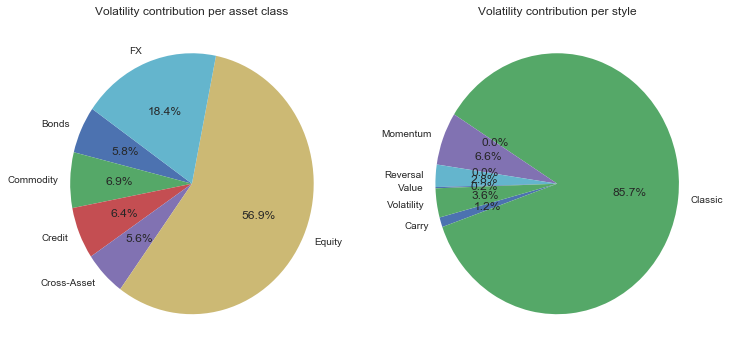

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
vol_contrib_asset_class.groupby(level=0).sum().plot(kind='pie', y=repli, legend=False, autopct='%1.1f%%', ax=ax1,
                                              title='Volatility contribution per asset class', startangle=145)
ax1.set_ylabel('')
vol_contrib_style.groupby(level=0).sum().plot(kind='pie', y=repli, legend=False, autopct='%1.1f%%', ax=ax2,
                                              title='Volatility contribution per style', startangle=195)
_ = ax2.set_ylabel('')

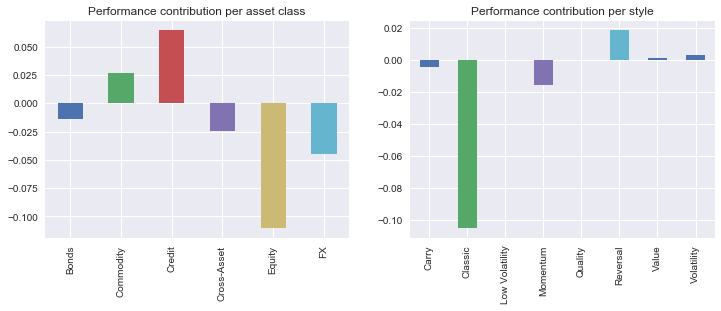

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
perf_contrib_asset_class[repli].groupby(level=0).sum().plot(kind='bar', ax=ax1,
                                                     title='Performance contribution per asset class')
ax1.set_xlabel('')
perf_contrib_style[repli].groupby(level=0).sum().plot(kind='bar', ax=ax2,
                                                     title='Performance contribution per style')
_ = ax2.set_xlabel('')